In [44]:
from ete3 import Tree, TreeStyle, Tree, TextFace, add_face_to_node, faces
import pandas as pd

In [45]:
ts = TreeStyle()
ts.show_leaf_name = False

In [46]:
def mylayout(node):
    if not node.is_leaf():
        F = TextFace(node.name, tight_text = True)
        add_face_to_node(F, node, column=0, position='branch-right')
    if node.is_leaf():
        F = TextFace(node.org, tight_text = True)
        add_face_to_node(F, node, column=0, position='branch-right')

In [47]:
cd /Users/aug/workspace/bio/sRNA/ecoli/gloome/GLOOME_run_15198434995282_rfam

/Users/aug/workspace/bio/sRNA/ecoli/gloome/GLOOME_run_15198434995282_rfam


In [48]:
t = Tree('Tree_with_inner_nodes_notation.ph', format=1)

In [49]:
store -r asmbly_name

In [50]:
asmbly_name

{'GCF_000006645.1': 'Yersinia pestis KIM10+',
 'GCF_000007885.1': 'Yersinia pestis biovar Microtus str. 91001',
 'GCF_000009065.1': 'Yersinia pestis CO92',
 'GCF_000013805.1': 'Yersinia pestis Nepal516',
 'GCF_000013825.1': 'Yersinia pestis Antiqua',
 'GCF_000016445.1': 'Yersinia pestis Pestoides F',
 'GCF_000018805.1': 'Yersinia pestis Angola',
 'GCF_000022805.1': 'Yersinia pestis D106004',
 'GCF_000022825.1': 'Yersinia pestis D182038',
 'GCF_000022845.1': 'Yersinia pestis Z176003',
 'GCF_000186725.1': 'Yersinia pestis biovar Medievalis str. Harbin 35',
 'GCF_000222975.1': 'Yersinia pestis A1122',
 'GCF_000834235.1': 'Yersinia pestis',
 'GCF_000834275.1': 'Yersinia pestis',
 'GCF_000834315.1': 'Yersinia pestis Pestoides F',
 'GCF_000834335.1': 'Yersinia pestis',
 'GCF_000834495.1': 'Yersinia pestis',
 'GCF_000834755.1': 'Yersinia pestis A1122',
 'GCF_000834775.1': 'Yersinia pestis',
 'GCF_000834825.1': 'Yersinia pestis Antiqua',
 'GCF_000834845.1': 'Yersinia pestis Angola',
 'GCF_0008

In [51]:
asmbly_name['GCF_000006745.1'] = 'Vibrio cholerae O1 biovar El Tor str. N16961'

In [52]:
for node in t.traverse():
    if node.name in asmbly_name:
        node.add_features(org=asmbly_name[node.name])

In [53]:
ts.layout_fn = mylayout

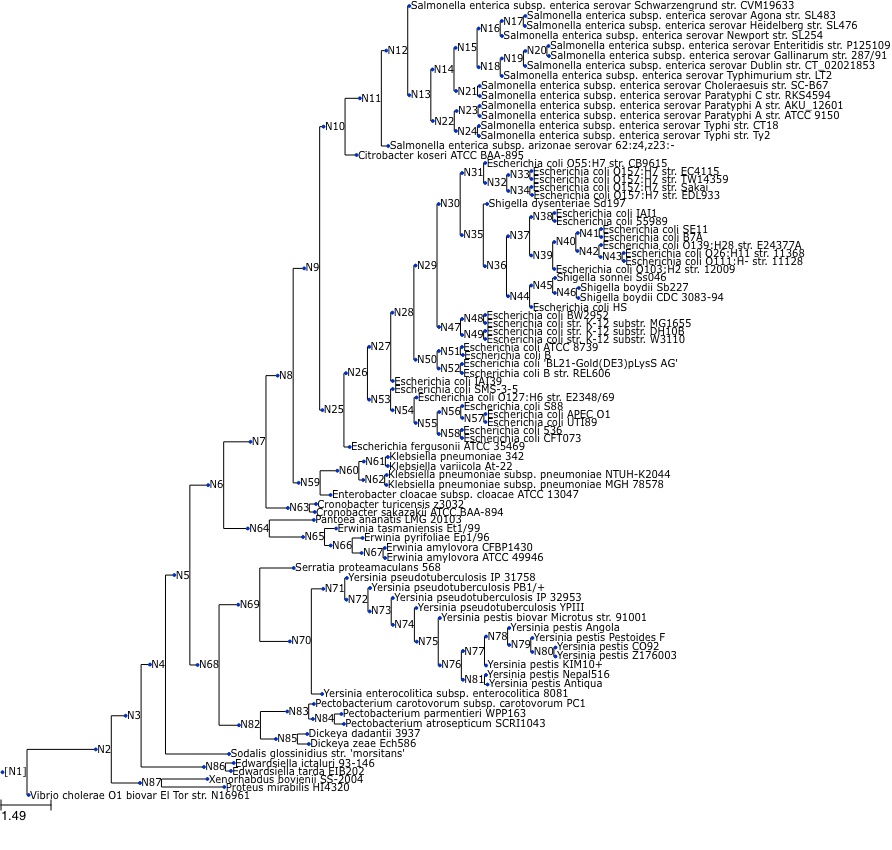

In [54]:
t.render('%%inline', tree_style=ts)

In [55]:
df = pd.read_table('Ancestral_reconstuction_of_states_per_position_per_node.txt')

In [56]:
loi = t.get_leaves_by_name('GCF_000005845.2')[0].get_ancestors()
l = [i.name for i in loi]
l.append('N1')
ndf = df[df.Node.isin(l)]

In [57]:
l

['N48',
 'N47',
 'N29',
 'N28',
 'N27',
 'N26',
 'N25',
 'N9',
 'N8',
 'N7',
 'N6',
 'N5',
 'N4',
 'N3',
 'N2',
 '[N1]',
 'N1']

In [58]:
def make_num(val):
    if val.startswith('N'):
        n = val.split('N')[1]
    elif val.startswith('['):
        n = 1
    return int(n)

In [59]:
ndf['Node'] = ndf['Node'].apply(make_num)

/Users/aug/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [60]:
gnd = dict()

In [61]:
ndf.dropna(subset=['Node'], inplace=True)

/Users/aug/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
ndf

,POS,Node,State,Prob
68,1,48,1,1.000000
72,1,47,1,1.000000
73,1,29,1,1.000000
81,1,28,1,1.000000
83,1,27,1,1.000000
97,1,26,1,0.999900
99,1,25,1,0.815400
100,1,9,1,0.640100
110,1,8,1,0.150200
114,1,7,1,0.059920


In [63]:
for pos, data in ndf.groupby('POS'):
    gn = '999' 
    for i, row in data.sort_values(by=['Node'], ascending=False).iterrows():
        if row['Prob'] >= 0.70:
            gn = row['Node']
            continue
        else:
            break
    gnd[pos] = gn

In [64]:
gnd

{1: 25.0,
 2: 8.0,
 3: 7.0,
 4: 7.0,
 5: 26.0,
 6: 7.0,
 7: 3.0,
 8: 7.0,
 9: 9.0,
 10: 1.0,
 11: 8.0,
 12: 7.0,
 13: 7.0,
 14: 8.0,
 15: 8.0,
 16: 9.0,
 17: 7.0,
 18: 9.0,
 19: 7.0,
 20: 7.0,
 21: 9.0,
 22: 9.0,
 23: 9.0,
 24: 7.0,
 25: 2.0,
 26: 2.0,
 27: 47.0,
 28: 26.0,
 29: 8.0,
 30: 25.0,
 31: 1.0,
 32: 6.0,
 33: 2.0,
 34: 7.0,
 35: 26.0,
 36: 1.0,
 37: 2.0,
 38: 25.0,
 39: 1.0,
 40: 2.0,
 41: 2.0,
 42: 28.0,
 43: 7.0,
 44: 8.0,
 45: 26.0,
 46: 7.0,
 47: 8.0,
 48: 3.0,
 49: 9.0,
 50: 7.0,
 51: 25.0,
 52: 26.0,
 53: 3.0,
 54: 8.0,
 55: 7.0,
 56: 3.0,
 57: 2.0,
 58: 1.0,
 59: 2.0,
 60: 9.0,
 61: 2.0,
 62: 8.0,
 63: 8.0,
 64: 1.0,
 65: 7.0,
 66: 1.0,
 67: 8.0,
 68: 47.0,
 69: 8.0,
 70: 7.0,
 71: 1.0,
 72: 7.0,
 73: 7.0,
 74: 7.0,
 75: 28.0,
 76: 1.0,
 77: 1.0,
 78: 9.0,
 79: 1.0,
 80: 2.0}

In [65]:
gns = pd.Series(gnd).value_counts()

In [66]:
gns

7.0     20
8.0     12
1.0     11
2.0     10
9.0      9
26.0     5
3.0      4
25.0     4
28.0     2
47.0     2
6.0      1
dtype: int64

In [67]:
d = {'N' + str(int(k)): v for k, v in gns.to_dict().items()}

In [68]:
d

{'N1': 11,
 'N2': 10,
 'N25': 4,
 'N26': 5,
 'N28': 2,
 'N3': 4,
 'N47': 2,
 'N6': 1,
 'N7': 20,
 'N8': 12,
 'N9': 9}

In [69]:
d['[N1]'] = d['N1']

In [70]:
d

{'N1': 11,
 'N2': 10,
 'N25': 4,
 'N26': 5,
 'N28': 2,
 'N3': 4,
 'N47': 2,
 'N6': 1,
 'N7': 20,
 'N8': 12,
 'N9': 9,
 '[N1]': 11}

In [71]:
for node in t.traverse():
    if node.name in d:
        node.add_features(gain=d[node.name])
    else:
        node.add_features(gain=0)

In [72]:
for node in t.traverse():
    if not node.is_leaf():
        print(node.name, node.gain)

[N1] 11
N2 10
N3 4
N87 0
N4 0
N86 0
N5 0
N6 1
N68 0
N7 20
N64 0
N69 0
N82 0
N8 12
N63 0
N65 0
N70 0
N83 0
N85 0
N9 9
N59 0
N66 0
N71 0
N84 0
N10 0
N25 4
N60 0
N67 0
N72 0
N11 0
N26 5
N61 0
N62 0
N73 0
N12 0
N27 0
N53 0
N74 0
N13 0
N28 2
N54 0
N75 0
N14 0
N22 0
N29 0
N50 0
N55 0
N76 0
N15 0
N21 0
N23 0
N24 0
N30 0
N47 2
N51 0
N52 0
N56 0
N58 0
N77 0
N81 0
N16 0
N18 0
N31 0
N35 0
N48 0
N49 0
N57 0
N78 0
N17 0
N19 0
N32 0
N36 0
N79 0
N20 0
N33 0
N34 0
N37 0
N44 0
N80 0
N38 0
N39 0
N45 0
N40 0
N46 0
N41 0
N42 0
N43 0


In [73]:
def gnlayout(node):
    if not node.is_leaf():
        F = TextFace(node.name, tight_text = True)
        add_face_to_node(F, node, column=0, position='branch-right')
        node.img_style["size"] += node.gain # Increase node sphere size by gain frequency
        if node.gain > 0:
            G = TextFace(node.gain, tight_text = True, fsize=14, bold=True, fgcolor='Green')
            add_face_to_node(G, node, column=0, position='branch-top')
    if node.is_leaf():
        F = TextFace(node.org, tight_text = True)
        add_face_to_node(F, node, column=0, position='branch-right')

In [75]:
ts.layout_fn = gnlayout

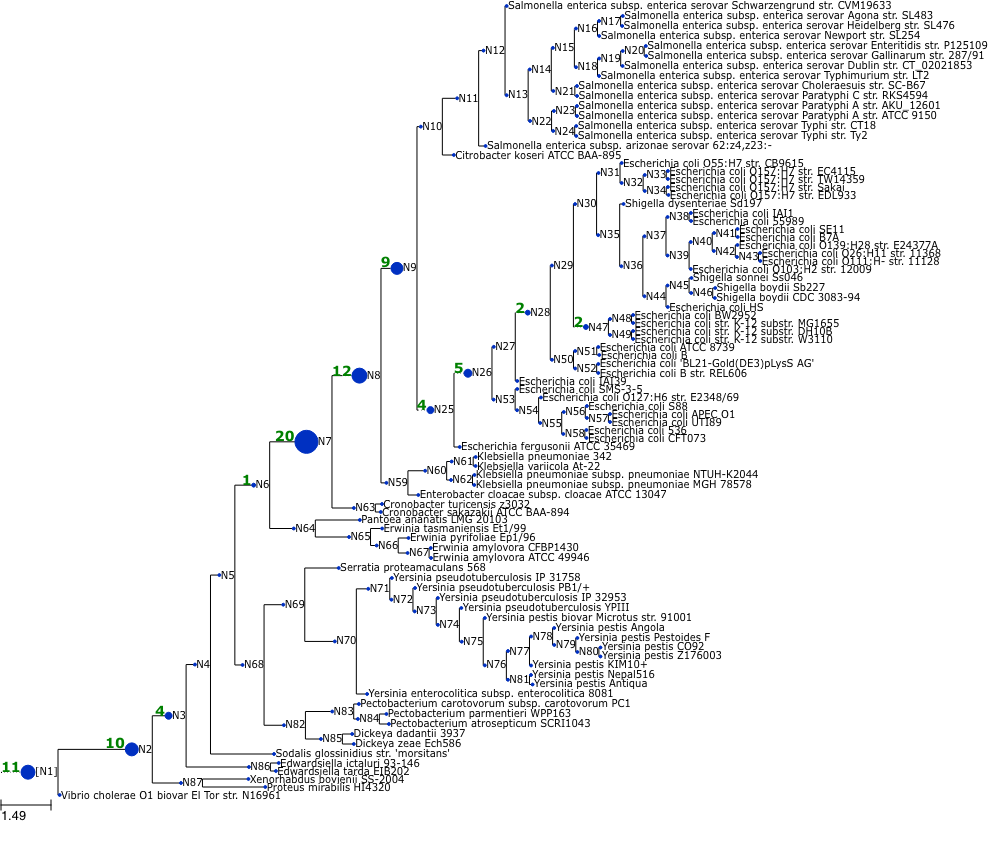

In [76]:
t.render('%%inline', tree_style=ts)

#### from prep_rfam_for_GLOOME

In [77]:
%store -r pa

In [78]:
s = {x:y for (x, y) in zip(range(1, 81), pa.columns.tolist())}

In [79]:
s

{1: 'C0465_rf',
 2: 'Esr1_EC',
 3: 'Esr2_EC',
 4: 'Esr4_EC',
 5: 'Esr5_EC',
 6: 'Esr6_EC',
 7: 'Esr8_EC',
 8: 'Esr9_EC',
 9: 'OrzO-P_rf',
 10: 'P26_rf',
 11: 'STnc130_rf',
 12: 'STnc180_rf',
 13: 'STnc240_rf',
 14: 'STnc3000_ST',
 15: 'STnc3160_ST',
 16: 'STnc3390_ST',
 17: 'STnc4080_ST',
 18: 'STnc410_rf',
 19: 'STnc4180_ST',
 20: 'STnc430_rf',
 21: 'STnc480_rf',
 22: 'STnc520_ST',
 23: 'STnc740_ST',
 24: 'STnc880_ST',
 25: 'Tpke11_EC_rf',
 26: 'arcZ_EC_rf',
 27: 'c0293_EC',
 28: 'c0299_EC',
 29: 'c0343_EC',
 30: 'c0719_EC',
 31: 'csrB_EC',
 32: 'csrC_EC_rf',
 33: 'cyaR_EC_rf',
 34: 'dsrA_EC',
 35: 'eyeA_EC',
 36: 'ffs_EC',
 37: 'fnrS_EC_rf',
 38: 'gadY_EC_rf',
 39: 'gcvB_EC',
 40: 'glmY_EC_rf',
 41: 'glmZ_EC_rf',
 42: 'is128_EC',
 43: 'iscRS_rf',
 44: 'isrA_EC',
 45: 'isrC_EC',
 46: 'istR_EC_rf',
 47: 'mgrR_STnc560_EC_rf',
 48: 'micA_EC_rf',
 49: 'micC_EC_rf',
 50: 'micF_EC_rf',
 51: 'ohsC_EC',
 52: 'ompn3_EC',
 53: 'omrB_EC',
 54: 'oxyS_EC',
 55: 'psrD_EC',
 56: 'psrN_EC',
 57: 'psr

In [80]:
sdf = pd.concat([pd.Series(gnd), pd.Series(s)], axis=1)

In [81]:
sdf = sdf.rename(columns={0: 'gain_node'})

In [82]:
sdf['gain_node'] = pd.to_numeric(sdf['gain_node'])

In [84]:
sdf

,gain_node,1
1,25.0,C0465_rf
2,8.0,Esr1_EC
3,7.0,Esr2_EC
4,7.0,Esr4_EC
5,26.0,Esr5_EC
6,7.0,Esr6_EC
7,3.0,Esr8_EC
8,7.0,Esr9_EC
9,9.0,OrzO-P_rf
10,1.0,P26_rf


In [85]:
%store sdf

Stored 'sdf' (DataFrame)


In [35]:
bins = [0, 3, 8, 999]
labels = ['old', 'teenage', 'baby']

In [36]:
sdf['age_bin'] = pd.cut(sdf['gain_node'], bins=bins, labels=labels)

In [37]:
sdf['age_bin'].value_counts()

teenage    38
old        24
baby       18
Name: age_bin, dtype: int64

In [38]:
sdf.rename(columns={1: 'name'}, inplace=True)

In [39]:
for i, d in sdf.groupby('age_bin'):
    print(i)
    print(d['name'])

old
7             Esr8_EC
10             P26_rf
25       Tpke11_EC_rf
26         arcZ_EC_rf
31            csrB_EC
33         cyaR_EC_rf
36             ffs_EC
37         fnrS_EC_rf
39            gcvB_EC
40         glmY_EC_rf
41         glmZ_EC_rf
48         micA_EC_rf
53            omrB_EC
56            psrN_EC
57    psrO_SraG_EC_rf
58            rnpB_EC
59         rprA_EC_rf
61            rybB_EC
64         ryeB_EC_rf
66         ryhB_EC_rf
71             spf_EC
76            ssrA_EC
77      ssrS_6S_EC_rf
79      tff_t44_EC_rf
Name: name, dtype: object
teenage
2                Esr1_EC
3                Esr2_EC
4                Esr4_EC
6                Esr6_EC
8                Esr9_EC
11            STnc130_rf
12            STnc180_rf
13            STnc240_rf
14           STnc3000_ST
15           STnc3160_ST
16           STnc3390_ST
17           STnc4080_ST
18            STnc410_rf
19           STnc4180_ST
20            STnc430_rf
22            STnc520_ST
24            STnc880_ST
29       

In [40]:
sdf

,gain_node,name,age_bin
1,24.0,C0465_rf,baby
2,7.0,Esr1_EC,teenage
3,6.0,Esr2_EC,teenage
4,6.0,Esr4_EC,teenage
5,25.0,Esr5_EC,baby
6,6.0,Esr6_EC,teenage
7,2.0,Esr8_EC,old
8,6.0,Esr9_EC,teenage
9,24.0,OrzO-P_rf,baby
10,3.0,P26_rf,old


In [41]:
c = pa[['rnpB_EC', 'ffs_EC', 'ssrA_EC', 'csrB_EC']]

In [42]:
c.to_csv('conserved_sRNAs_only.csv')

In [43]:
pa

,C0465_rf,Esr1_EC,Esr2_EC,Esr4_EC,Esr5_EC,Esr6_EC,Esr8_EC,Esr9_EC,OrzO-P_rf,P26_rf,...,spf_EC,sroB_EC,sroC_EC,sroE_EC,sroH_EC,ssrA_EC,ssrS_6S_EC_rf,symR_EC,tff_t44_EC_rf,tp2_ST_rf
assembly,,,,,,,,,,,,,,,,,,,,,
GCF_000020745.1,0,0,0,1,0,1,1,1,0,1,...,1,1,1,1,0,1,1,0,1,1
GCF_000020885.1,0,0,0,1,0,1,1,1,0,1,...,1,1,1,1,0,1,1,0,1,1
GCF_000020705.1,0,0,0,1,0,1,1,1,0,1,...,1,1,1,1,0,1,1,1,1,1
GCF_000016045.1,0,0,0,1,0,1,1,1,0,1,...,1,1,1,1,0,1,1,1,1,1
GCF_000009505.1,0,0,0,1,0,1,1,1,0,1,...,1,1,1,1,0,1,1,0,1,1
GCF_000009525.1,0,0,0,1,0,1,1,1,0,1,...,1,1,1,1,0,1,1,0,1,1
GCF_000020925.1,0,0,0,1,0,1,1,1,0,1,...,1,1,1,1,0,1,1,0,1,1
GCF_000006945.2,0,0,0,1,0,1,1,1,0,1,...,1,1,1,1,0,1,1,1,1,1
GCF_000008105.1,0,0,0,1,0,1,1,1,0,1,...,1,1,1,1,0,1,1,1,1,1


In [44]:
rgn = sdf.set_index('name')

In [45]:
rgn

,gain_node,age_bin
name,,
C0465_rf,24.0,baby
Esr1_EC,7.0,teenage
Esr2_EC,6.0,teenage
Esr4_EC,6.0,teenage
Esr5_EC,25.0,baby
Esr6_EC,6.0,teenage
Esr8_EC,2.0,old
Esr9_EC,6.0,teenage
OrzO-P_rf,24.0,baby


In [46]:
%store rgn

Stored 'rgn' (DataFrame)


In [83]:
t.render('rfam_gn.png', tree_style=ts)

{'faces': [[46.0, 767.1918449401855, 69.0, 777.1918449401855, 0, '[N1]'],
  [1.0, 762.1918449401855, 21.0, 772.1918449401855, 0, '11'],
  [159.29367308254194,
   745.8836898803711,
   173.29367308254194,
   752.8836898803711,
   1,
   'N2'],
  [116.29367308254194,
   738.3836898803711,
   136.29367308254194,
   749.3836898803711,
   1,
   '10'],
  [197.09722975641722,
   711.7673797607422,
   211.09722975641722,
   719.7673797607422,
   2,
   'N3'],
  [176.09722975641722,
   705.7673797607422,
   186.09722975641722,
   715.7673797607422,
   2,
   '4'],
  [221.49095943154893,
   661.0347595214844,
   235.49095943154893,
   668.0347595214844,
   3,
   'N4'],
  [245.85133690915072,
   571.5695190429688,
   259.85133690915075,
   578.5695190429688,
   4,
   'N5'],
  [281.67267695240247,
   481.1571044921875,
   295.67267695240247,
   489.1571044921875,
   5,
   'N6'],
  [266.67267695240247,
   475.1571044921875,
   276.67267695240247,
   485.1571044921875,
   5,
   '1'],
  [363.97137465244